In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
from numpy import percentile
from scipy.stats import spearmanr
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy.stats import kendalltau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
x = pd.read_excel("C:/Users/Engineer Asad yousuf/Desktop/Data set two/LearningVariables (1).xlsx")

In [3]:
y = pd.read_excel('C:/Users/Engineer Asad yousuf/Desktop/Data set two/LearningY (1).xlsx')

In [4]:
x.describe()

,Unnamed: 0,nodeline_Y,oos,oop,epskfy,epskfc,cover,time
count,9368.000000,9368.000000,9368.000000,9368.000000,9368.000000,9368.000000,9368.000000,9368.000000
mean,4683.500000,0.000037,0.000003,0.000019,0.022815,0.069157,56.000994,173.878813
std,2704.452995,0.017295,0.017277,0.005774,2.308672,2.280203,23.098603,133.339230
min,0.000000,-0.029997,-0.029997,-0.009999,-3.999600,-3.999600,16.004000,0.200000
25%,2341.750000,-0.014963,-0.014915,-0.004978,-1.976600,-1.888600,36.032000,47.812500
50%,4683.500000,0.000096,0.000018,0.000024,0.034800,0.080000,55.960000,154.891667
75%,7025.250000,0.015000,0.014920,0.005026,2.022200,2.038200,76.086000,315.241667
max,9367.000000,0.029997,0.029991,0.009999,3.999600,3.999600,95.996000,360.000000


In [12]:
x.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
x.describe()

,nodeline_Y,oos,oop,epskfy,epskfc,cover,time
count,9368.000000,9368.000000,9368.000000,9368.000000,9368.000000,9368.000000,9368.000000
mean,0.000037,0.000003,0.000019,0.022815,0.069157,56.000994,173.878813
std,0.017295,0.017277,0.005774,2.308672,2.280203,23.098603,133.339230
min,-0.029997,-0.029997,-0.009999,-3.999600,-3.999600,16.004000,0.200000
25%,-0.014963,-0.014915,-0.004978,-1.976600,-1.888600,36.032000,47.812500
50%,0.000096,0.000018,0.000024,0.034800,0.080000,55.960000,154.891667
75%,0.015000,0.014920,0.005026,2.022200,2.038200,76.086000,315.241667
max,0.029997,0.029991,0.009999,3.999600,3.999600,95.996000,360.000000


In [14]:
y.describe()

,Unnamed: 0,Load
count,9368.000000,9368.000000
mean,4683.500000,5669.650262
std,2704.452995,2717.815084
min,0.000000,1000.475000
25%,2341.750000,3314.437500
50%,4683.500000,5650.250000
75%,7025.250000,7994.612500
max,9367.000000,10499.525000


In [17]:
y.drop('Unnamed: 0',axis=1,inplace=True)

# Checking the distribution of data and outliers.

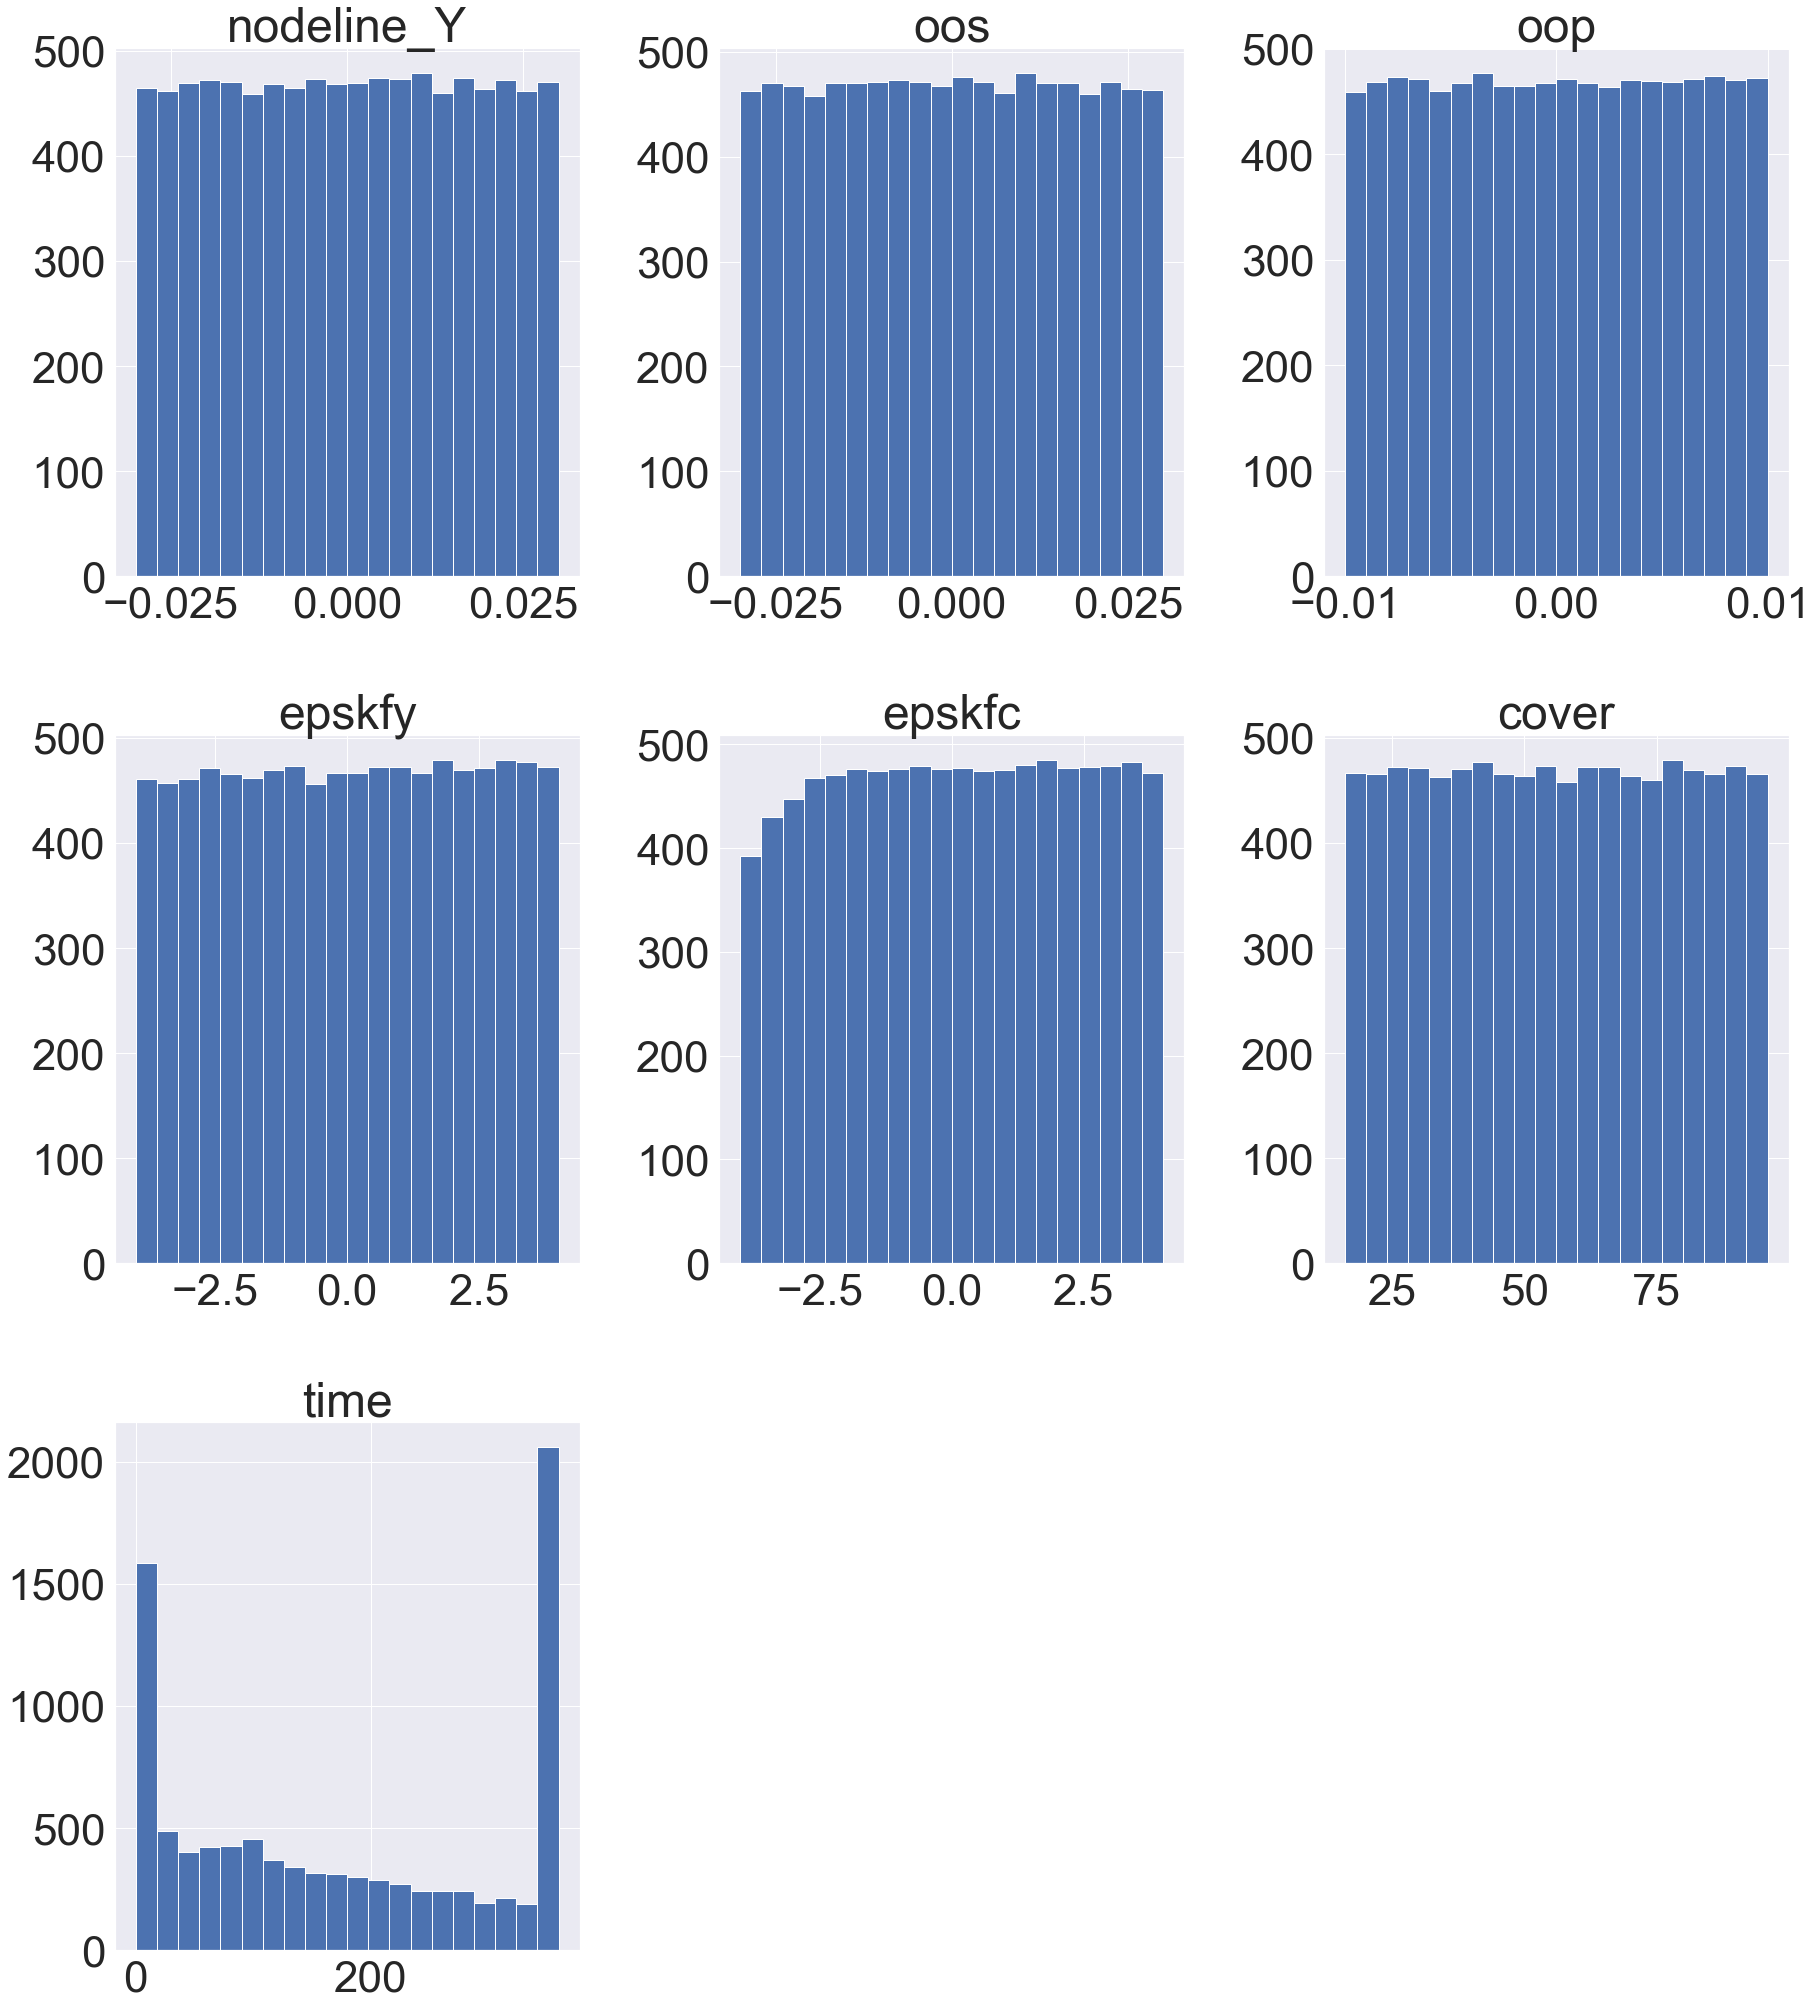

In [20]:
sn.set(font_scale=4)
x.hist(figsize=(30,35),bins=20)
plt.show()

In [21]:
def outliers_removal(data_frame, column):
    # Step-1 sorting the data
    sorted(data_frame)
    #Step-2 finding the quartiles
    Q3=np.percentile(data_frame[column], 75)
    Q1=np.percentile(data_frame[column], 25)
    # Calculating Inter Quartile Range
    IQR=Q3-Q1
    # Calculating the bounds
    lower_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR
    # Removing the outliers
    data_frame.drop(data_frame[ (data_frame[column] > upper_bound) | (data_frame[column] < lower_bound) ].index , inplace=True)
    return data_frame

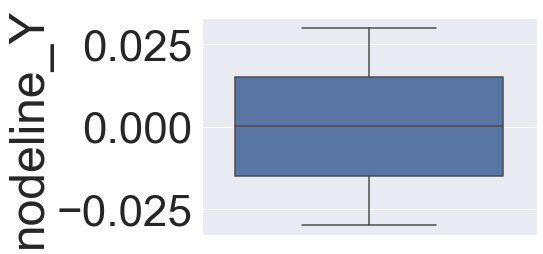

In [24]:
sn.boxplot(y=x['nodeline_Y'])
plt.show()

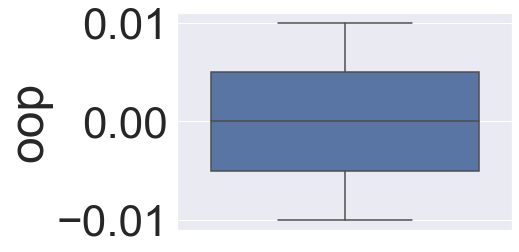

In [25]:
sn.boxplot(y=x['oop'])
plt.show()

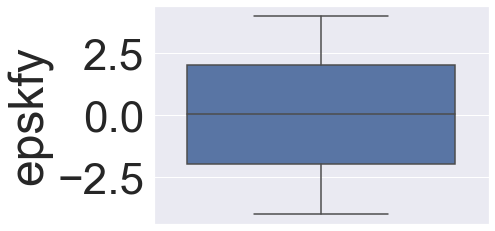

In [26]:
sn.boxplot(y=x['epskfy'])
plt.show()

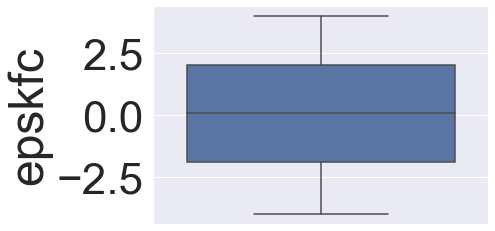

In [28]:
sn.boxplot(y=x['epskfc'])
plt.show()

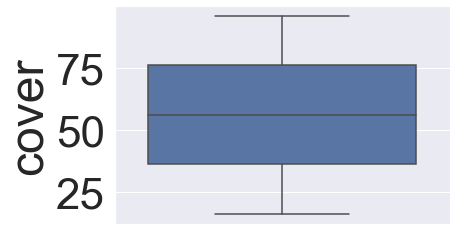

In [30]:
sn.boxplot(y=x['cover'])
plt.show()

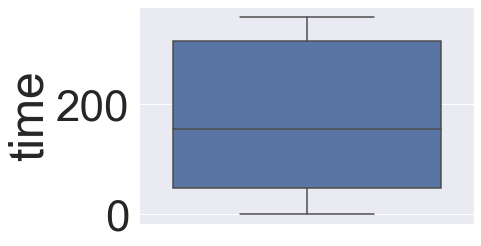

In [31]:
sn.boxplot(y=x['time'])
plt.show()

# checking correlations
**Checking Pearson Corrleation**

Pearson check the linearity
Spearman check montonacity
Kindeal check the same as that of spearman in a error known mode


In [32]:
train_data=pd.concat([x, y], axis=1)

In [33]:
train_data.columns

Index(['nodeline_Y', 'oos', 'oop', 'epskfy', 'epskfc', 'cover', 'time',
       'Load'],
      dtype='object')

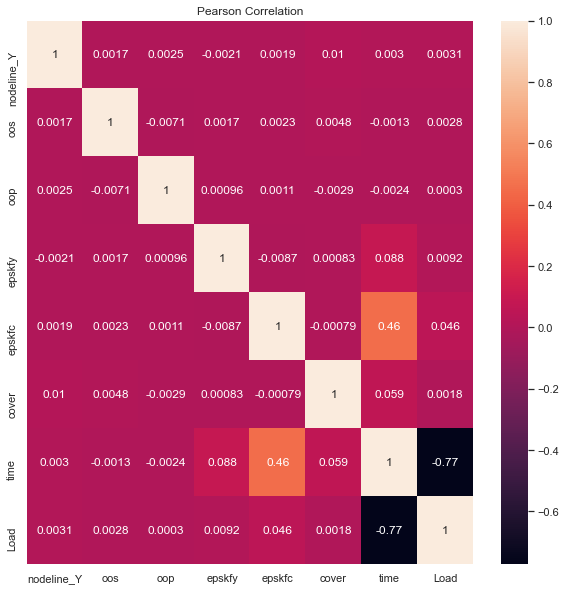

In [35]:
sn.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10,10))
# Pearson Correlation
pearson_corr_data = train_data.corr(method='pearson')
sn.heatmap(pearson_corr_data,annot=True)
ax.set_title('Pearson Correlation')
plt.savefig("Pearson_Corr.png")

<AxesSubplot:>

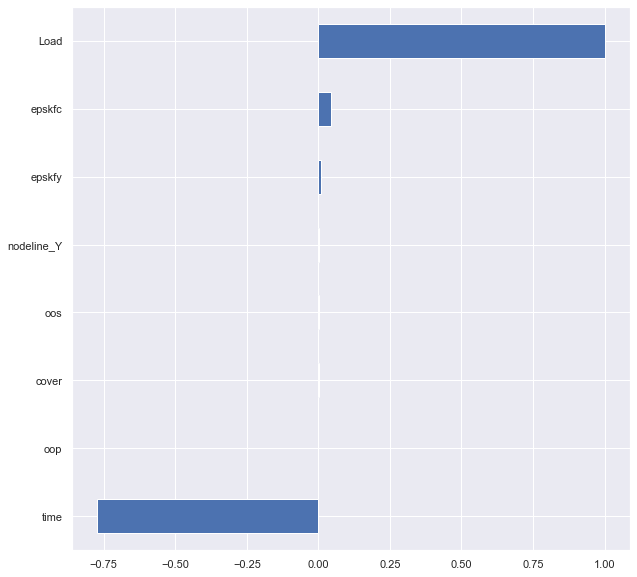

In [36]:
plt.figure(figsize=(10,10))
pearson_corr_data['Load'].sort_values().plot(kind="barh")

In [37]:
pearson_corr_data['Load'].sort_values(ascending=False)

Load          1.000000
epskfc        0.045751
epskfy        0.009192
nodeline_Y    0.003121
oos           0.002843
cover         0.001750
oop           0.000298
time         -0.772478
Name: Load, dtype: float64

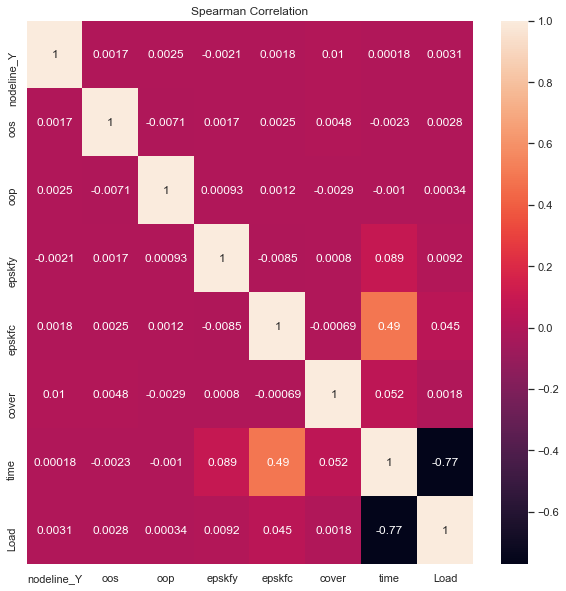

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
# spearman Correlation
spearman_corr_data =train_data.corr(method='spearman')
sn.heatmap(spearman_corr_data ,annot=True)
ax.set_title('Spearman Correlation')
plt.savefig("Spearman_Corr.png")

<AxesSubplot:>

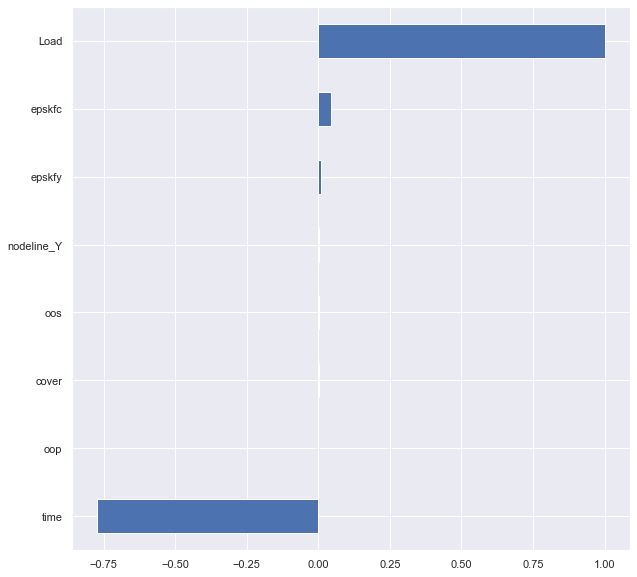

In [39]:
plt.figure(figsize=(10,10))
spearman_corr_data["Load"].sort_values().plot(kind="barh")

In [40]:
spearman_corr_data['Load'].sort_values(ascending=False)

Load          1.000000
epskfc        0.044816
epskfy        0.009218
nodeline_Y    0.003088
oos           0.002813
cover         0.001820
oop           0.000340
time         -0.771823
Name: Load, dtype: float64

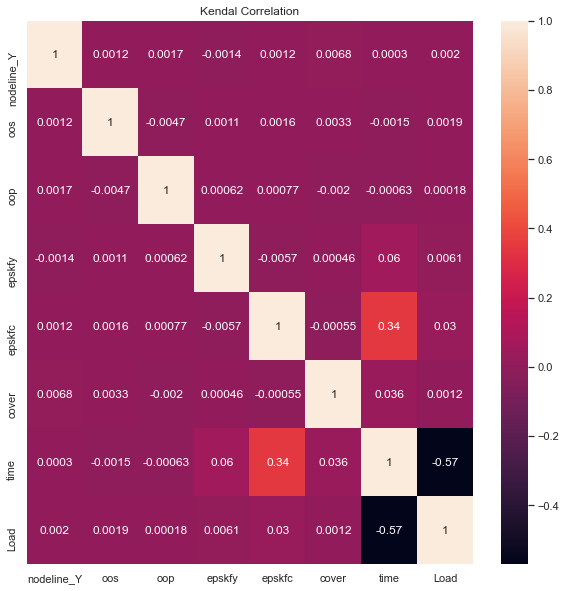

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
# spearman Correlation
kendal_corr_data = train_data.corr(method='kendall')
sn.heatmap(kendal_corr_data ,annot=True)
ax.set_title('Kendal Correlation')
plt.savefig("Kindall_Corr.png")

<AxesSubplot:>

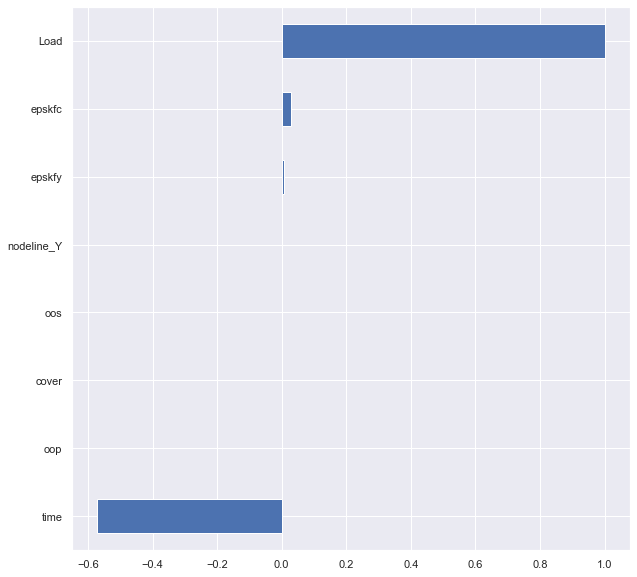

In [42]:
plt.figure(figsize=(10,10))
kendal_corr_data["Load"].sort_values().plot(kind="barh")

In [43]:
kendal_corr_data['Load'].sort_values(ascending=False)

Load          1.000000
epskfc        0.029863
epskfy        0.006124
nodeline_Y    0.002034
oos           0.001930
cover         0.001171
oop           0.000182
time         -0.570908
Name: Load, dtype: float64

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=357)

In [46]:
sc_X = StandardScaler()
X_data = sc_X.fit_transform(x_train)
data_std=pd.DataFrame(X_data)

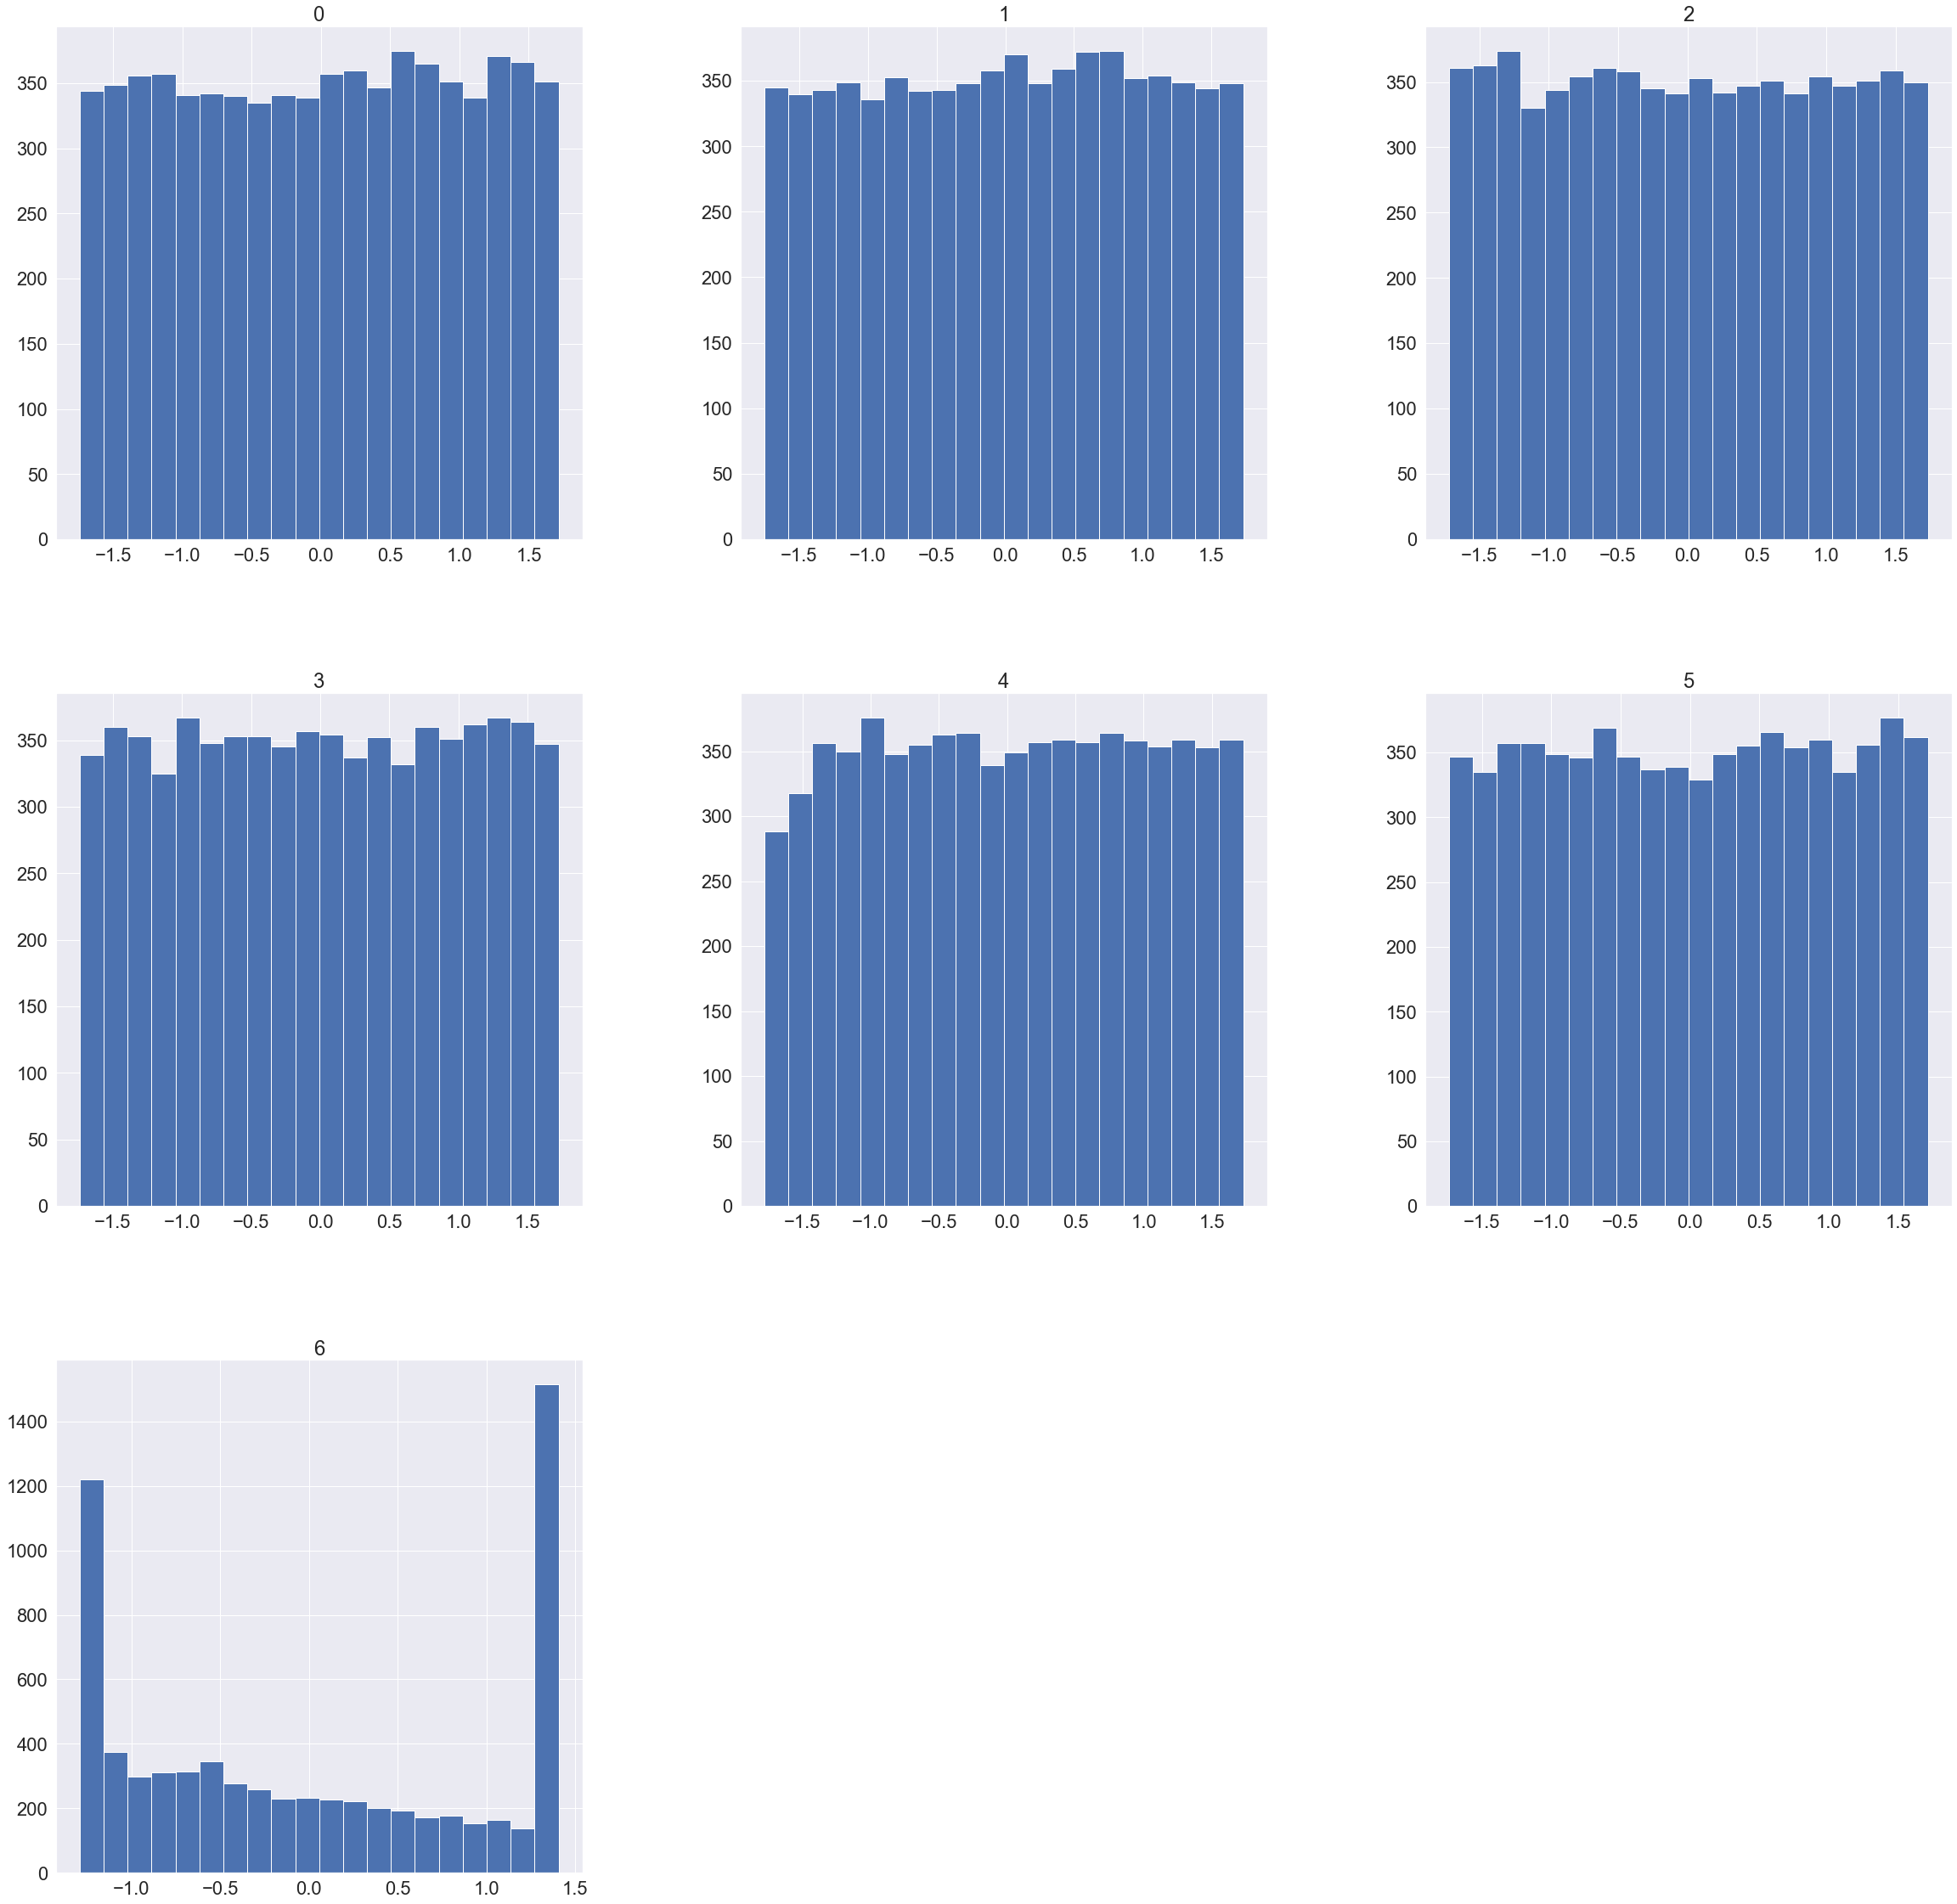

In [47]:
sn.set(font_scale=2)
data_std.hist(figsize=(40,40),bins=20)
plt.show()

In [48]:
X_train=x_train.values
Y_train=y_train.values/1000
X_test=x_test.values
Y_test=y_test.values/1000

In [49]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Selection of Regression algorithm
For the selection of suitable regression algorithm. We have to analyze the relationship between the attributes and the dependent variable.

As, the correlation between the inputs/attributes and the dependent variables is not above 0.7 of correlation measure. Therefore, it is indicating non-linear relation ship between the attributes and the dependent variable inspite of time which is indicating only relationship

Using simple Multi_Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
LM=LinearRegression()
LM.fit(X_train,Y_train)

LinearRegression()

In [52]:
Y_pred=LM.predict(X_test)

In [53]:
# Metrics
SROCC=spearmanr(Y_test,Y_pred)
KROCC=kendalltau(Y_test,Y_pred)
R_square=r2_score(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_pred,Y_test))
mae=mean_absolute_error(Y_pred,Y_test)

In [54]:
print("The computed root mean squared error is = ",rmse)
print("The computed mean absolute error is = ",mae)
print("The r2 measure for the model is = ",R_square)
print("The Spearman for the data is = ",SROCC)
print("The Kendall correlation for the data is = ",KROCC)

The computed root mean squared error is =  1.1572196958474887
The computed mean absolute error is =  0.9230748369053625
The r2 measure for the model is =  0.8210878739492113
The Spearman for the data is =  SpearmanrResult(correlation=0.9170571718904343, pvalue=0.0)
The Kendall correlation for the data is =  KendalltauResult(correlation=0.7418957571760373, pvalue=0.0)


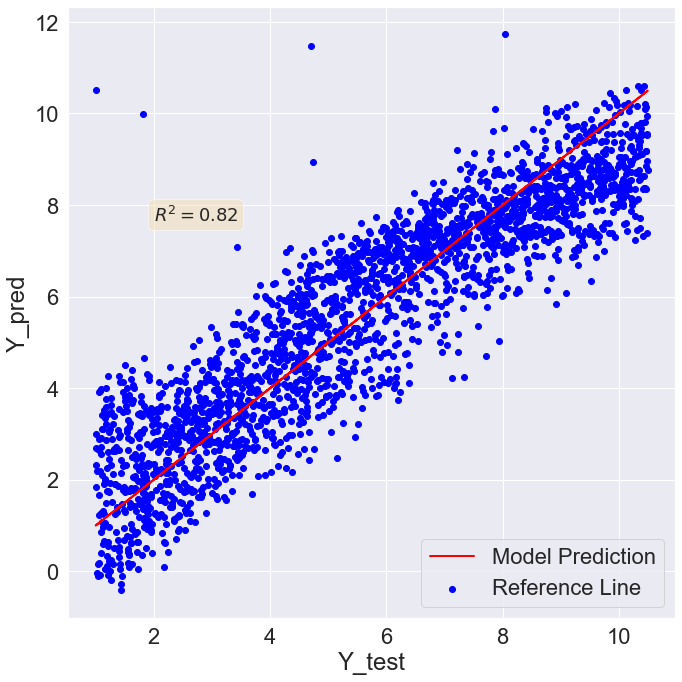

In [55]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred, c='blue',label='Reference Line')
plt.plot(Y_test,Y_test, color='red', linewidth=2,label="Model Prediction")
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.tight_layout()
plt.legend()
textstr = '$R^{2}=%.2f$' % R_square
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2, 8, textstr, fontsize=18,
        verticalalignment='top', bbox=props)
plt.show()

# **Using Ensemble Learning**

Ensembel models ususally perform better as compared to the normal models in most of the cases as they use some basic individual model as base learners and then design a met-model from all of these in the final stage. Therefore, using gradient boosting as first model by using the XGBOOST library

In [58]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from numpy import absolute

ModuleNotFoundError: No module named 'xgboost'